In [1]:
import modelframe as mf
import models as ms
import numpy as np
import torch
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

import plotutilities as pu
import datautilities as du

In [2]:
# torch.cuda.empty_cache()

In [3]:
binary_model_directory = "../model/model-binary-test-002"

binary_features, binary_labels = du.read_in_data("../data/dataset_all_H1_bootstrap_O3a.npy", {0:0,1:1,2:1,3:1,4:1,5:1,6:1})

os.makedirs(f"{binary_model_directory}/figures", exist_ok=True)

def run_binary_network_weighted():
    

   

    binary_model = ms.GlitchClassifier_2(6, 2)

    binary_frame = mf.GlitchModel(binary_model, binary_features, binary_labels, device = 'cuda')
    binary_frame.number_of_epochs = 500
    binary_frame.learning_rate = 0.000001
    binary_frame.setup(256)
    binary_frame.train()
    binary_frame.test_model()
    binary_frame.save_model(binary_model_directory, name = "model.pt")
    
    
    
    return binary_frame
    

In [ ]:
binary_frame_1 = run_binary_network_weighted()
# torch.cuda.empty_cache()

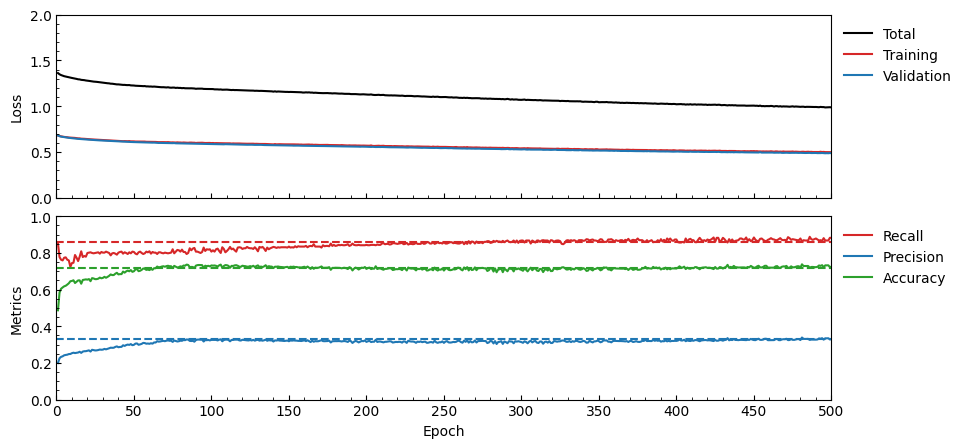

In [5]:

fig, ax = plt.subplots(2, 1, figsize = (10,5), squeeze=False, sharex=True)


epochs = np.arange(1, binary_frame_1.number_of_epochs+1, 1)

pu.plot_loss(ax[0,0], epochs, binary_frame_1.training_loss, binary_frame_1.validiation_loss)
pu.plot_confusion(ax[1,0],epochs, binary_frame_1.con_matrix_per_epoch, 0)
# ax[0,0].plot(epochs, binary_frame_1.recall, color = "blue", linestyle ="dashed")


ax[0,0].set_xticks(
    np.arange(0, binary_frame_1.number_of_epochs + 1, binary_frame_1.number_of_epochs // 10)
)
ax[1,0].set_xticks(
    np.arange(0, binary_frame_1.number_of_epochs + 1, binary_frame_1.number_of_epochs // 10)
)
if binary_frame_1.number_of_epochs // 50 >0:
    ax[1,0].xaxis.set_minor_locator(MultipleLocator(binary_frame_1.number_of_epochs//50))
    ax[0,0].xaxis.set_minor_locator(MultipleLocator(binary_frame_1.number_of_epochs//50))
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].set_xlim(0, binary_frame_1.number_of_epochs)
ax[1,0].set_ylim(0, 1)
ax[0,0].set_ylim(0,np.ceil(binary_frame_1.training_loss+ binary_frame_1.validiation_loss).max())
ax[0,0].set_xlim(0, binary_frame_1.number_of_epochs)

ax[1,0].set_xlabel("Epoch")

ax[1,0].axhline(binary_frame_1.test_accuracy, label = r"Accuracy(test)", zorder = 1, color = "tab:green", linestyle = "dashed")
ax[1,0].axhline(binary_frame_1.test_precision, label = r"Precision(test)", zorder = 1, color = "tab:blue", linestyle = "dashed")
ax[1,0].axhline(binary_frame_1.test_recall, label = r"Recall(test)", zorder = 1, color = "tab:red", linestyle = "dashed")


fig.subplots_adjust(hspace=0.1)

ax[0,0].tick_params(axis="y",direction="in",which="both")
ax[0,0].tick_params(axis="x",direction="in",which="both")

ax[1,0].tick_params(axis="y",direction="in",which="both")
ax[1,0].tick_params(axis="x",direction="in",which="both")

fig.savefig(f"{binary_model_directory}/figures/performance-overview-1.pdf", bbox_inches = "tight")
fig.savefig(f"{binary_model_directory}/figures/performance-overview-1.png", bbox_inches = "tight")

In [9]:
multi_model_directory = "../model/model-multi-test-002"

multi_features, multi_labels = du.read_in_data("../data/dataset_all_H1_bootstrap_O3a.npy", {0:0,1:1,2:2,3:3,4:4,5:5,6:6})

os.makedirs(f"{multi_model_directory}/figures", exist_ok=True)


def run_multi_network_uniform():
    

   

    multi_model = ms.GlitchClassifier_2(6, 7)

    multi_frame = mf.GlitchModel(multi_model, multi_features, multi_labels,{0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1}, device = 'cuda')
    multi_frame.number_of_epochs = 1500
    multi_frame.learning_rate = 0.000001
    # multi_frame.label_weight_set = 

    multi_frame.setup(256)
    multi_frame.train()
    multi_frame.test_model()
    multi_frame.save_model(multi_model_directory, name = "model.pt")
    
    
    
    return multi_frame
    



In [10]:
multi_frame_1 = run_multi_network_uniform()

'100%'

'Epoch 1500/1500, Train Loss: 0.7726, Val Loss: 0.7661, Precision: 0.5923, Recall: 0.4734, Accuracy: 0.7045'

Train time: 534.1714949607849


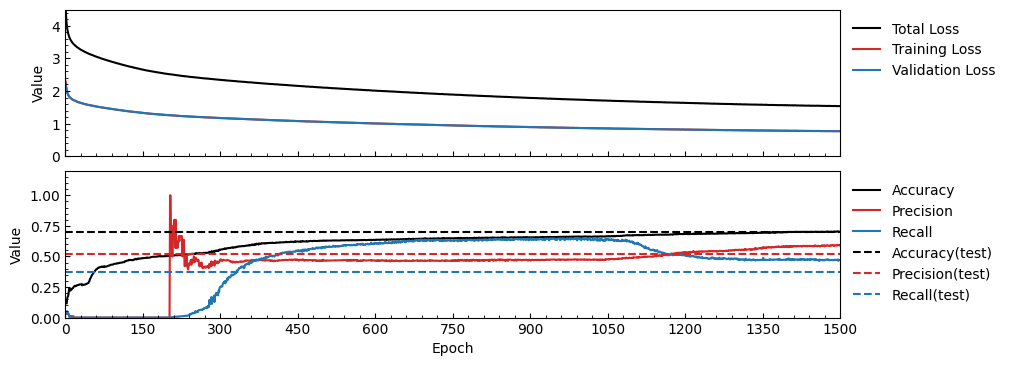

In [11]:

epochs = np.arange(1, multi_frame_1.number_of_epochs+1, 1)


fig, ax = plt.subplots(2, 1, squeeze=  False, figsize = (10, 4),sharex=True)
ax[0,0].plot(epochs, multi_frame_1.training_loss + multi_frame_1.validiation_loss, label = r"Total Loss", zorder= 1, color = "k")
ax[0,0].plot(epochs, multi_frame_1.training_loss, label = r"Training Loss",zorder = 1, color = "tab:red")
ax[0,0].plot(epochs, multi_frame_1.validiation_loss, label = r"Validation Loss",zorder = 1, color = "tab:blue")
ax[1,0].plot(epochs, multi_frame_1.accuracy, label = r"Accuracy",zorder = 1, color = "k")
ax[1,0].plot(epochs, multi_frame_1.precision, label = r"Precision",zorder = 1, color = "tab:red")
ax[1,0].plot(epochs, multi_frame_1.recall, label = r"Recall",zorder = 1, color = "tab:blue")

ax[1,0].axhline(multi_frame_1.test_accuracy, label = r"Accuracy(test)", zorder = 1, color = "k", linestyle = "dashed")
ax[1,0].axhline(multi_frame_1.test_precision, label = r"Precision(test)", zorder = 1, color = "tab:red", linestyle = "dashed")
ax[1,0].axhline(multi_frame_1.test_recall, label = r"Recall(test)", zorder = 1, color = "tab:blue", linestyle = "dashed")

# ax[0,0].axhline((total_loss).mean(),zorder= 0,color = "k", linestyle = "dotted")
# ax[0,0].axhline((total_accuracy).mean(),zorder= 0,color = "k", linestyle = "dotted")
ax[0,0].set_ylabel(r"Value")
ax[1,0].set_ylabel(r"Value")
for i in range(2):
    ax[i,0].tick_params(axis="y",direction="in",which="both")
    ax[i,0].tick_params(axis="x",direction="in",which="both")
    # ax[i,0].set_yticks(np.arange(0, np.max(total_loss), int(np.max(total_loss)) /10))
    ax[i,0].set_xticks(np.arange(0, multi_frame_1.number_of_epochs + 1, multi_frame_1.number_of_epochs // 10))
    ax[i,0].xaxis.set_minor_locator(MultipleLocator(multi_frame_1.number_of_epochs//50))
    ax[i,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].set_xlabel(r"Epoch")
# ax[0,0].set_ylabel("Value")
ax[0,0].set_xlim(0, multi_frame_1.number_of_epochs)
ax[0,0].set_ylim(0, np.max(multi_frame_1.training_loss + multi_frame_1.validiation_loss))
ax[1,0].set_ylim(0, 1.2)
ax[0,0].legend(frameon=False, ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
ax[1,0].legend(frameon=False, ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
fig.subplots_adjust(hspace=0.1)


fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.png", bbox_inches = "tight")

# ax[0,0].grid(True,which="minor")

In [8]:
import modelframe as mf
import models as ms
import numpy as np
import torch
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

import plotutilities as pu
import datautilities as du

multi_model_directory = "../model/model-multi-test-004"

multi_features, multi_labels = du.read_in_data("../data/dataset_all_H1_bootstrap_O3a.npy", {0:0,1:1,2:2,3:3,4:4,5:5,6:6})

os.makedirs(f"{multi_model_directory}/figures", exist_ok=True)


def run_multi_network_uniform():
    

   

    multi_model = ms.GlitchClassifier_4(6, 7)

    multi_frame = mf.GlitchModel(multi_model, multi_features, multi_labels,{0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1}, device = 'cuda')
    multi_frame.number_of_epochs = 150
    multi_frame.learning_rate = 0.0001
    # multi_frame.label_weight_set = 

    multi_frame.setup(256)
    multi_frame.train()
    multi_frame.test_model()
    multi_frame.save_model(multi_model_directory, name = "model.pt")
    
    
    
    return multi_frame
    



In [9]:
multi_frame_1 = run_multi_network_uniform()

'100%'

'Epoch 150/150, Train Loss: 1.4664, Val Loss: 1.4659, Precision: 0.6119, Recall: 0.5038, Accuracy: 0.6966'

Train time: 49.02760171890259


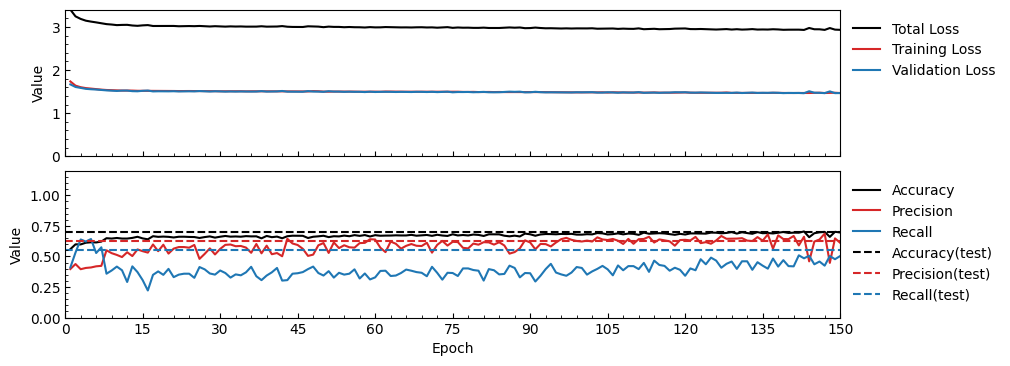

In [10]:

fig,ax = pu.plot_performance(multi_frame_1)


fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.pdf", bbox_inches = "tight")
fig.savefig(f"{multi_model_directory}/figures/performance-overview-1.png", bbox_inches = "tight")

# ax[0,0].grid(True,which="minor")